This exercise intends to compare the performance of OLS, Ridge and Lasso from the perspective of beta profile. 

In [16]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
N = 10000 # number of samples
p = 100 # number of predictors

In [31]:
# Generate data samples X according to normal distribution, note they are correlated
rho = 0.9
SigmaX = np.empty([p,p])
SigmaX.fill(rho)
SigmaX = SigmaX + np.identity(p) * (1-rho)
muX = np.zeros(p)
X = np.random.multivariate_normal(muX, SigmaX, N)

In [21]:
X.shape

(10000, 100)

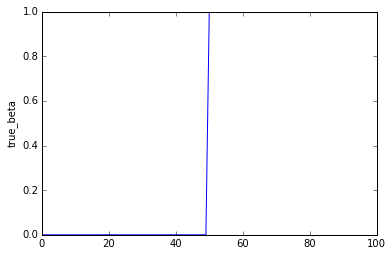

In [32]:
# True value of beta
true_beta = np.zeros([p,1])
true_beta[p/2:p, 0] = 1
plt.plot(true_beta)
plt.ylabel("true_beta")

In [33]:
#Generate noise and observations y
noise_std = 1
noise = np.random.normal(0, noise_std, [N,1])
y = np.dot(X, true_beta) + noise

In [34]:
lr = linear_model.LinearRegression()

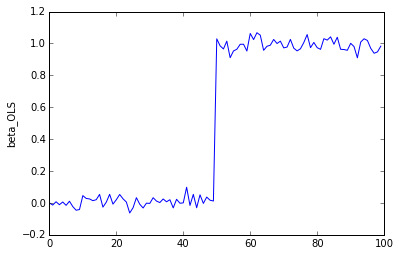

In [35]:
#OLS
lr.fit(X,y)
beta_OLS = np.squeeze(lr.coef_)
plt.plot(beta_OLS)
plt.ylabel("beta_OLS")

In [30]:
np.squeeze(lr.coef_).shape

(100,)

In [15]:
lr.intercept_

array([ 0.00046983])

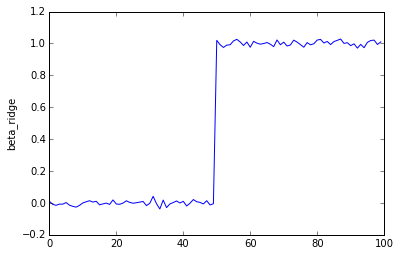

In [11]:
#Ridge
ridge = linear_model.Ridge(alpha = 0.1, fit_intercept = False, normalize = True)
ridge.fit(X,y)
beta_ridge = np.squeeze(ridge.coef_)
plt.plot(beta_ridge)
plt.ylabel("beta_ridge")

This is a bit unexpected. Why Ridge gives similar result as OLS? Needs some investigation

In [12]:
#Lasso
lasso = linear_model.Lasso(alpha = 0.1, fit_intercept = False, normalize = True, max_iter = 50000)

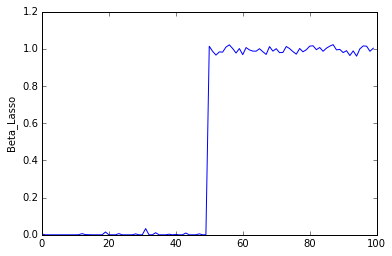

In [13]:
lasso.fit(X,y)
beta_lasso = np.squeeze(lasso.coef_)
plt.plot(beta_lasso)
plt.ylabel("Beta_Lasso")